In [2]:
import sys
import os
sys.path.append("../../../../src/")
#Imports
import numpy as np
import scipy as sp
import numpy.linalg as la
import matplotlib.pyplot as plt
#Custom made imports
import single_particle_sector as sps


/home/kristian/miniconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/kristian/miniconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(0.0, 0.5)

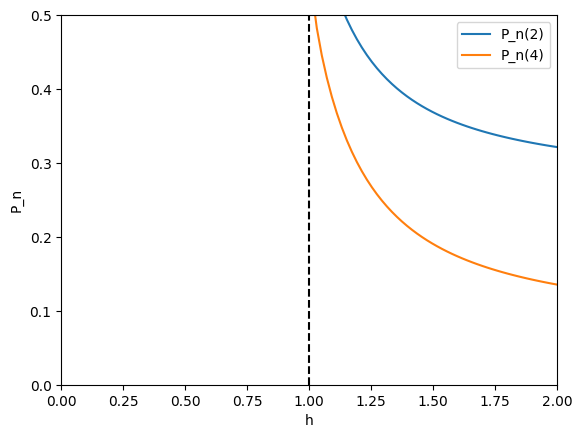

In [3]:
#Initialize Test
J = 1
L = 150
h_i = np.linspace(0,2,100)

dat = []
dat2= []
dat3= []
for h in h_i:
    H = sps.H_bdg(h,L,J)
    E,V = la.eigh(H)
    G = sps.G_tfim(V[:,:L])
    dat.append(sps.P_n(2,G))
    dat2.append(sps.P_n(4,G))
    #dat3.append(sps.P_n(8,G))
plt.plot(h_i,dat, label = "P_n(2)")
plt.plot(h_i,dat2, label = "P_n(4)")
#plt.plot(h_i,dat3, label = "P_n(8)")
plt.legend()
plt.xlabel("h")
plt.ylabel("P_n")
plt.vlines(1,0,.5, color = "black", linestyle = "--")
plt.xlim(h_i[0],h_i[-1])
plt.ylim(0,.5)

(0.0, 2.0)

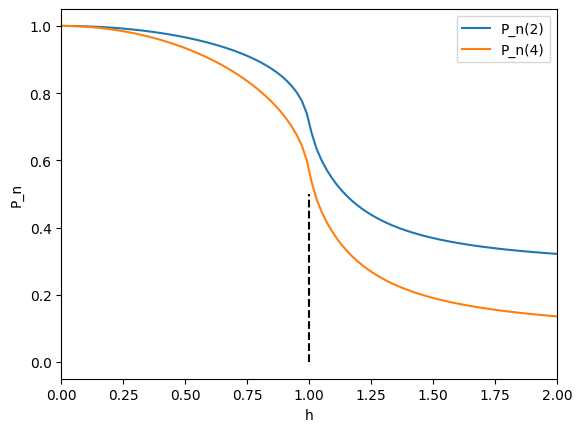

In [4]:
plt.plot(h_i,dat, label = "P_n(2)")
plt.plot(h_i,dat2, label = "P_n(4)")
#plt.plot(h_i,dat3, label = "P_n(8)")
plt.legend()
plt.xlabel("h")
plt.ylabel("P_n")
plt.vlines(1,0,.5, color = "black", linestyle = "--")
plt.xlim(h_i[0],h_i[-1])
#plt.ylim(0,.5)

# Dependence on system size

In [5]:
system_sizes = [32,64,128]

data = []
for L in system_sizes:
    dat = []
    for h in h_i:
        H = sps.H_bdg(h,L,J)
        E,V = la.eigh(H)
        G = sps.G_tfim(V[:,:L])
        dat.append(sps.P_n(4,G))
    data.append(dat)


This figure shows that L = 64 is sufficient.


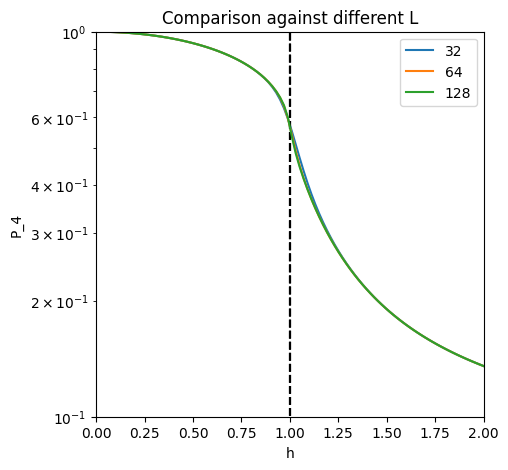

In [8]:
plt.figure(figsize = (5,5))
for i, L in enumerate(system_sizes):
    plt.title("Comparison against different L")
    plt.xlabel("h")
    plt.ylabel("P_4")
    plt.vlines(1,0,1, color = "black", linestyle = "--")
    plt.xlim(h_i[0],h_i[-1])
    plt.ylim(0.1,1)
    plt.plot(h_i, data[i], label = f"{L}")
plt.legend()
plt.yscale("log")
print("This figure shows that L = 64 is sufficient.")

# Adiabatic Tests

We re-attempt Probelm 8 of the helper paper

In [6]:
#Ground State Fidelity
def overlap(U,V):
    L = U.shape[0]//2
    U = U[:,:L]
    V = V[:,:L]
    overlap_matrix = U.conj().T @ V
    return la.det(overlap_matrix)

In [4]:
#Model Parameters
L = 64
J = 1
h0 = 0
hf = 2
taus = [.1,1,5,10,25,100]
N_steps = 1000
#Time Evolved States:
Ut_tau = []
GS_T_tau = []
times_tau =[]
for tau in taus:
    times = np.linspace(0,tau,N_steps)

    Ut = sps.TFIM_time_evolve(N_steps,tau,h0,hf,J,L)
    #Ground States
    GS_T = []
    for ti in range(N_steps):
        h = sps.h_t(times[ti],tau,h0,hf)
        H = sps.H_bdg(h,L,J)
        E,V = la.eigh(H)
        GS_T.append(V)
    Ut_tau.append(Ut)
    GS_T_tau.append(GS_T)
    times_tau.append(times)

<class 'numpy.ndarray'>


/home/kristian/miniconda3/lib/python3.12/site-packages/scipy/integrate/_ivp/ivp.py:621: UserWarning: The following arguments have no effect for a chosen solver: `dtype`.
  solver = method(fun, t0, y0, tf, vectorized=vectorized, **options)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


/home/kristian/miniconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/kristian/miniconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


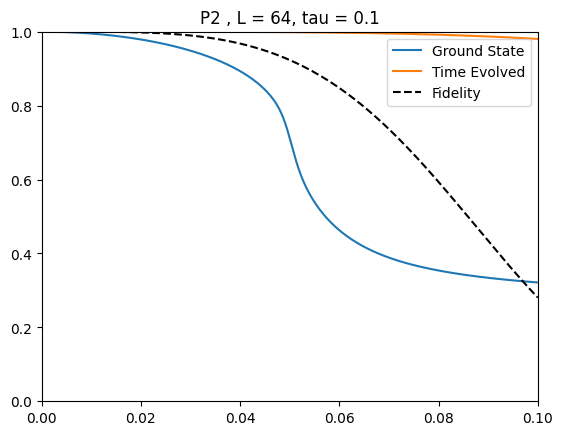

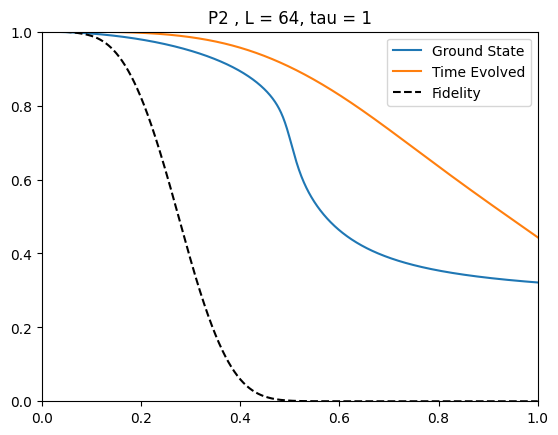

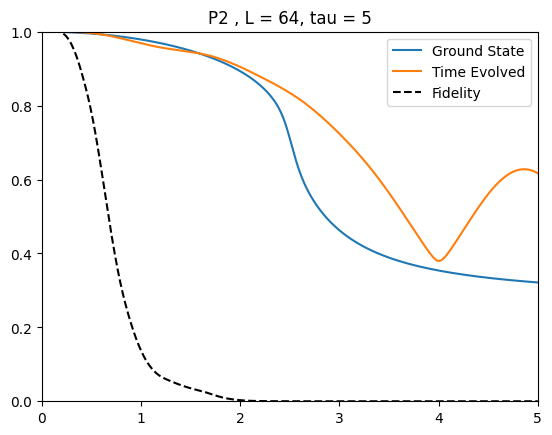

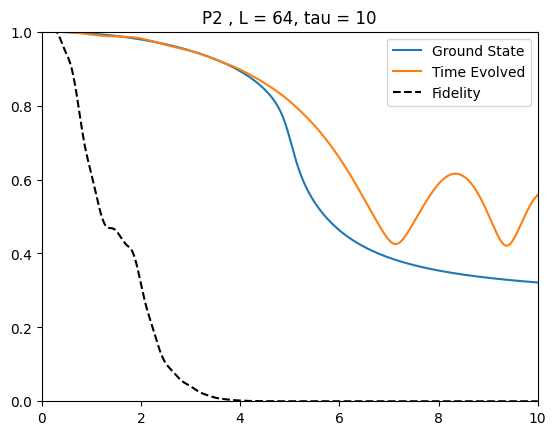

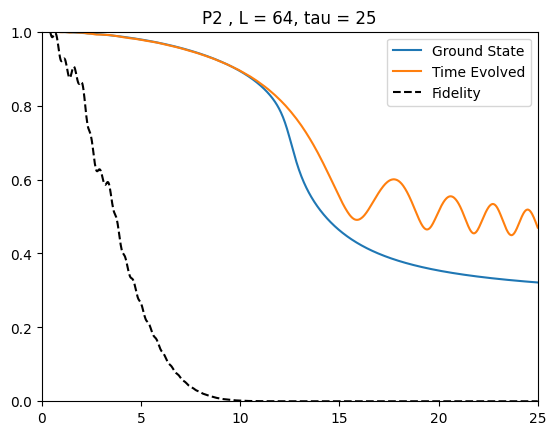

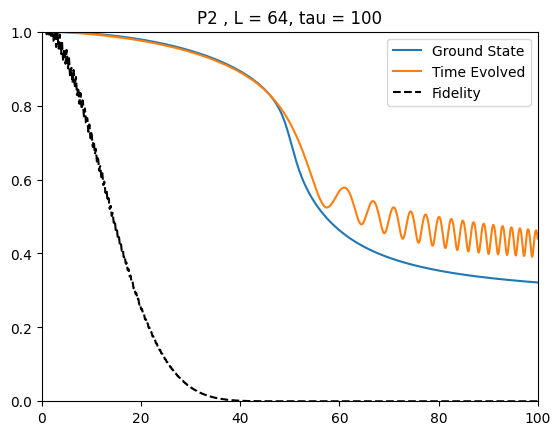

In [25]:
n = 2
#i = time step
for j in range(len(taus)):
    
    G_t =[sps.G_tfim(Ut_tau[j][ti][:,:L]) for ti in range(N_steps) ]
    G_gs = [sps.G_tfim(GS_T_tau[j][ti][:, :L]) for ti in range(N_steps)]
    P_t= [sps.P_n(n,Gi) for Gi in G_t]
    P_gs=[sps.P_n(n,Gi) for Gi in G_gs]


    fidelity = [np.abs(overlap(Ut_tau[j][ti],GS_T_tau[j][0]))**2 for ti in range(N_steps)]

    ##Plotting
    plt.figure()
    
    plt.plot(times_tau[j],P_gs,label = f"Ground State")
    plt.plot(times_tau[j],P_t, label = f"Time Evolved")
    plt.plot(times_tau[j],fidelity, label =f"Fidelity", color = "black",linestyle="--" )

    plt.title(f"P{n} , L = {L}, tau = {taus[j]}")

    plt.legend()
    plt.xlim(times_tau[j][0],times_tau[j][-1])
    plt.ylim(0,1)
    plt.show()



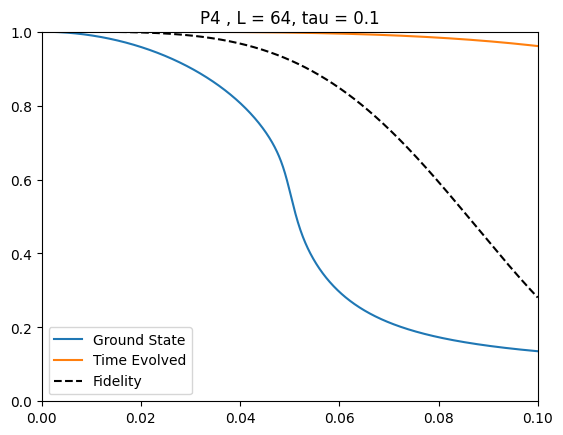

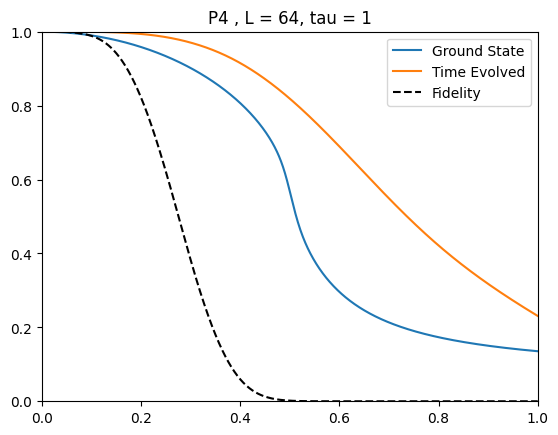

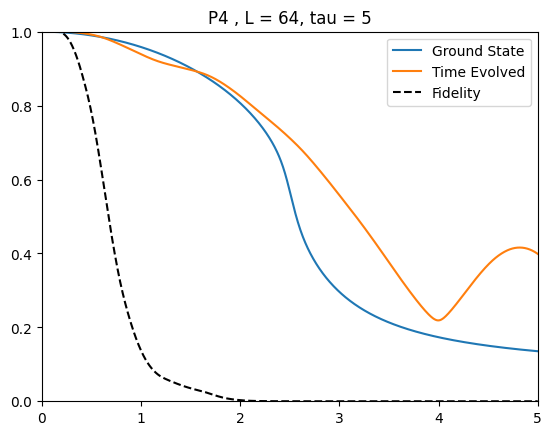

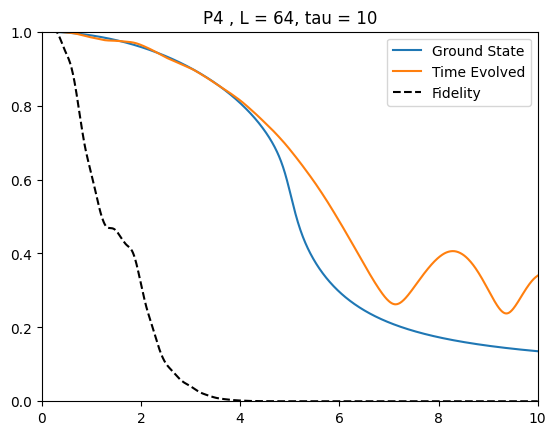

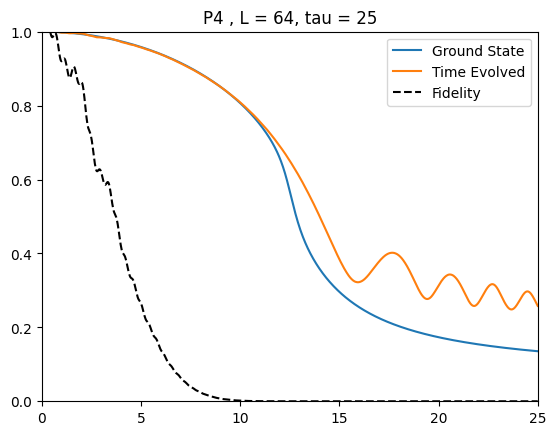

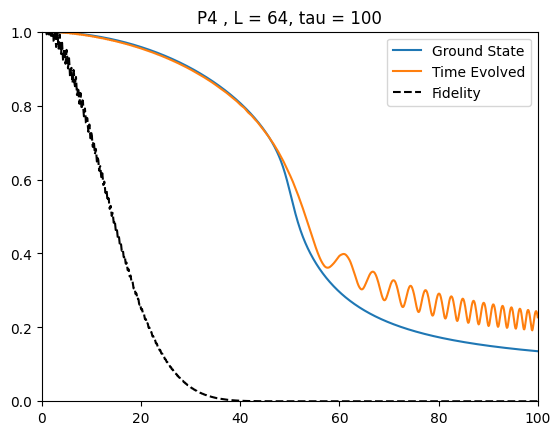

In [26]:
n = 4
#i = time step
for j in range(len(taus)):
    
    G_t =[sps.G_tfim(Ut_tau[j][ti][:,:L]) for ti in range(N_steps) ]
    G_gs = [sps.G_tfim(GS_T_tau[j][ti][:, :L]) for ti in range(N_steps)]
    P_t= [sps.P_n(n,Gi) for Gi in G_t]
    P_gs=[sps.P_n(n,Gi) for Gi in G_gs]


    fidelity = [np.abs(overlap(Ut_tau[j][ti],GS_T_tau[j][0]))**2 for ti in range(N_steps)]

    ##Plotting
    plt.figure()
    
    plt.plot(times_tau[j],P_gs,label = f"Ground State")
    plt.plot(times_tau[j],P_t, label = f"Time Evolved")
    plt.plot(times_tau[j],fidelity, label =f"Fidelity", color = "black",linestyle="--" )

    plt.title(f"P{n} , L = {L}, tau = {taus[j]}")

    plt.legend()
    plt.xlim(times_tau[j][0],times_tau[j][-1])
    plt.ylim(0,1)
    plt.show()


/home/kristian/miniconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


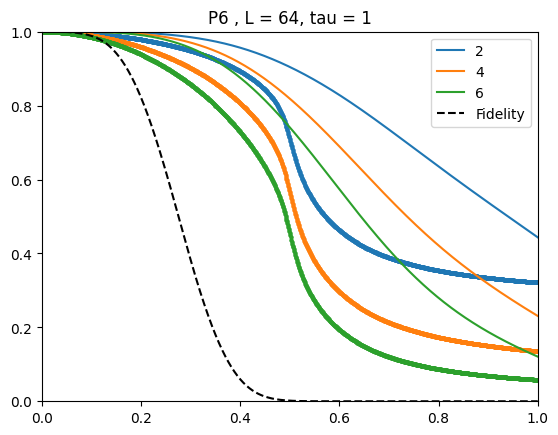

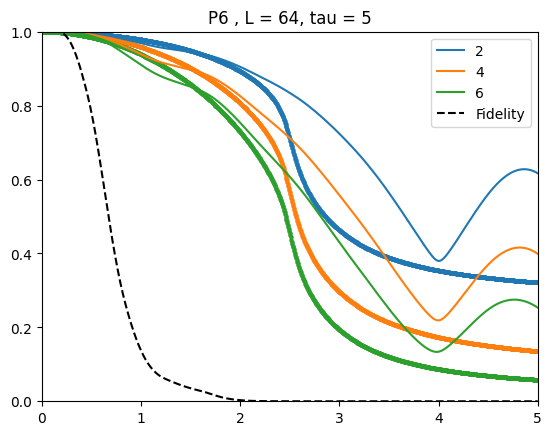

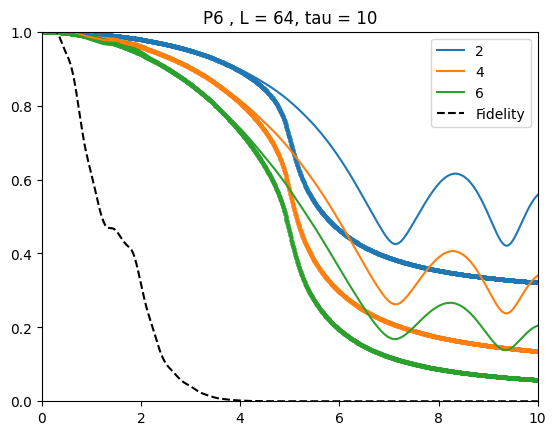

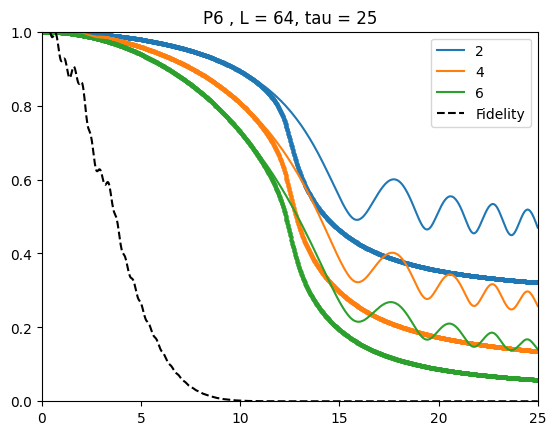

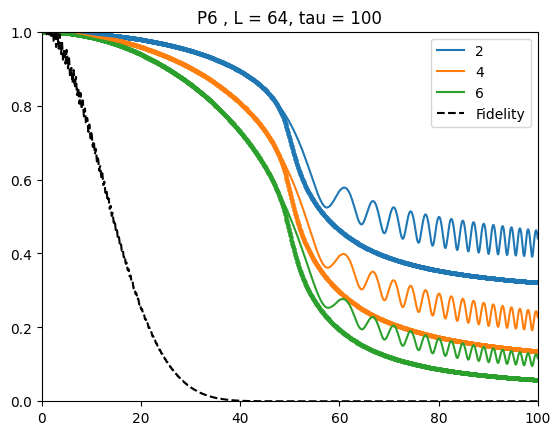

In [ ]:
ns = [2,4,6]
#i = time step
for j in range(1,len(taus)):
    plt.figure()    
    G_t =[sps.G_tfim(Ut_tau[j][ti][:,:L]) for ti in range(N_steps) ]
    G_gs = [sps.G_tfim(GS_T_tau[j][ti][:, :L]) for ti in range(N_steps)]
    fidelity = [np.abs(overlap(Ut_tau[j][ti],GS_T_tau[j][0]))**2 for ti in range(N_steps)]

    for n in ns:ns = [2,4,6]
#i = time step
for j in range(1,len(taus)):
    plt.figure()    
    G_t =[sps.G_tfim(Ut_tau[j][ti][:,:L]) for ti in range(N_steps) ]
    G_gs = [sps.G_tfim(GS_T_tau[j][ti][:, :L]) for ti in range(N_steps)]
    fidelity = [np.abs(overlap(Ut_tau[j][ti],GS_T_tau[j][0]))**2 for ti in range(N_steps)]

    for n in ns:
        P_t= [sps.P_n(n,Gi) for Gi in G_t]
        P_gs=[sps.P_n(n,Gi) for Gi in G_gs]
        plt.scatter(times_tau[j],P_gs, s = 5)
        plt.plot(times_tau[j],P_t, label = f"{n}")


    ##Plotting

    
    
    plt.plot(times_tau[j],fidelity, label =f"Fidelity", color = "black",linestyle="--" )

    plt.title(f"P{n} , L = {L}, tau = {taus[j]}")

    plt.legend()
    plt.xlim(times_tau[j][0],times_tau[j][-1])
    plt.ylim(0,1)
    plt.show()

    
    
    plt.plot(times_tau[j],fidelity, label =f"Fidelity", color = "black",linestyle="--" )

    plt.title(f"P{n} , L = {L}, tau = {taus[j]}")

    plt.legend()
    plt.xlim(times_tau[j][0],times_tau[j][-1])
    plt.ylim(0,1)
    plt.show()

/home/kristian/miniconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/kristian/miniconda3/lib/python3.12/site-packages/matplotlib/collections.py:197: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
/home/kristian/miniconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


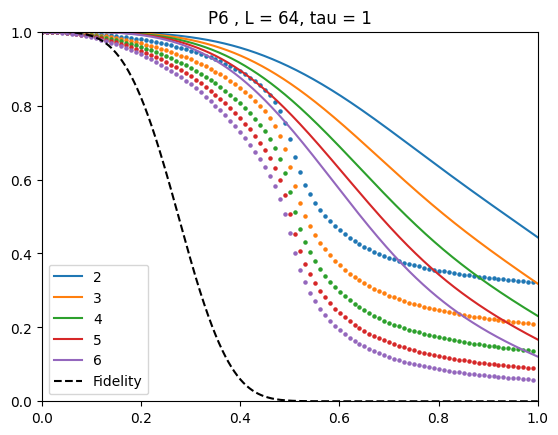

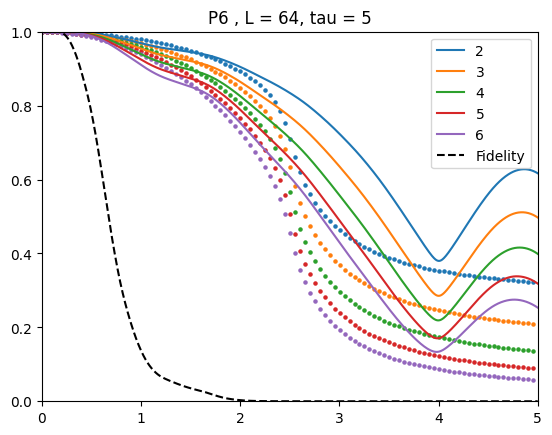

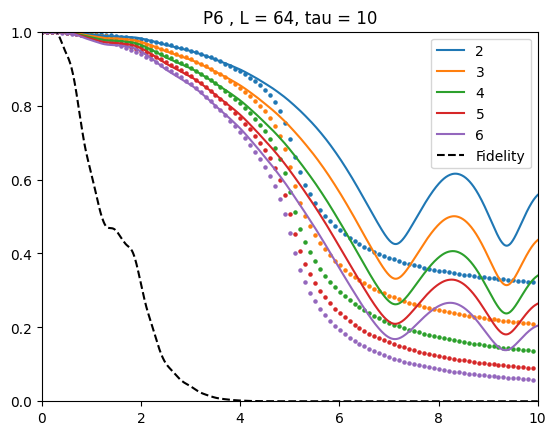

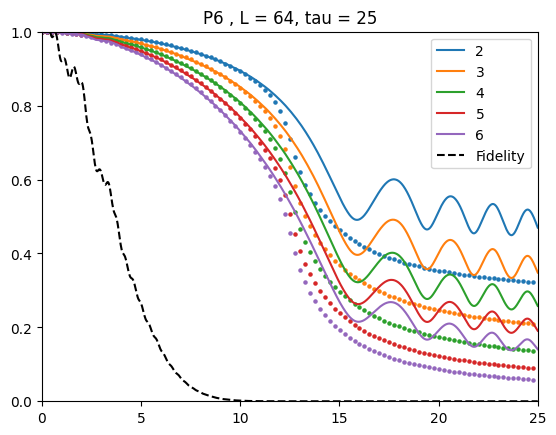

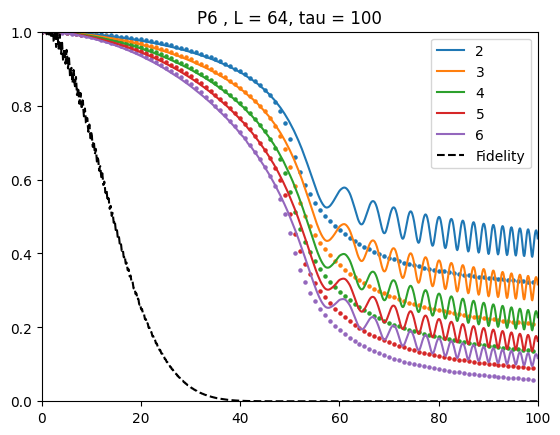

In [30]:
ns = [2,3,4,5,6]
#i = time step
for j in range(1,len(taus)):
    plt.figure()    
    G_t =[sps.G_tfim(Ut_tau[j][ti][:,:L]) for ti in range(N_steps) ]
    G_gs = [sps.G_tfim(GS_T_tau[j][ti][:, :L]) for ti in range(N_steps)]
    fidelity = [np.abs(overlap(Ut_tau[j][ti],GS_T_tau[j][0]))**2 for ti in range(N_steps)]

    for n in ns:
        P_t= [sps.P_n(n,Gi) for Gi in G_t]
        P_gs=[sps.P_n(n,Gi) for Gi in G_gs]
        plt.scatter(times_tau[j][::10],P_gs[::10], s = 5)
        plt.plot(times_tau[j],P_t, label = f"{n}")


    ##Plotting

    
    
    plt.plot(times_tau[j],fidelity, label =f"Fidelity", color = "black",linestyle="--" )

    plt.title(f"P{n} , L = {L}, tau = {taus[j]}")

    plt.legend()
    plt.xlim(times_tau[j][0],times_tau[j][-1])
    plt.ylim(0,1)
    plt.show()

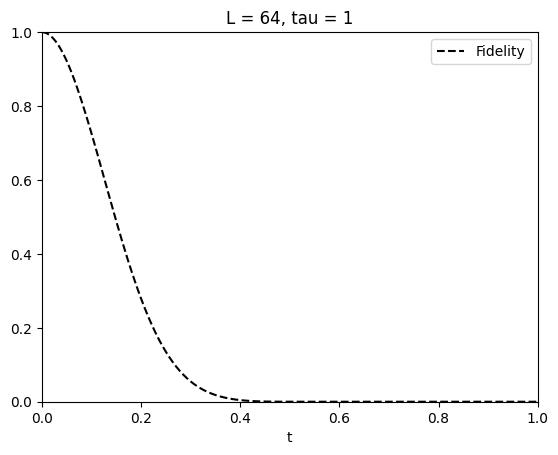

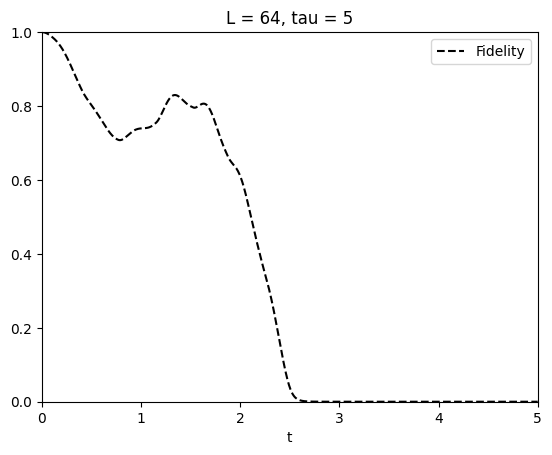

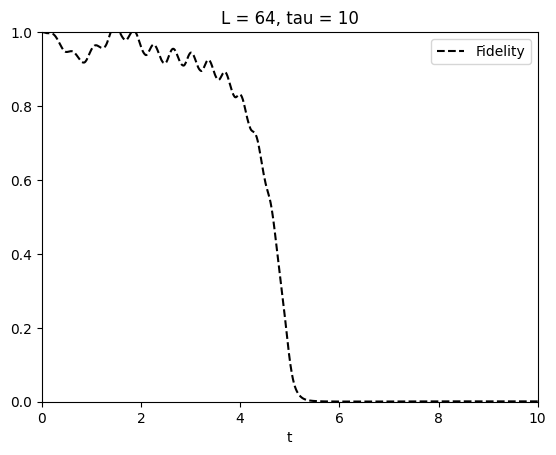

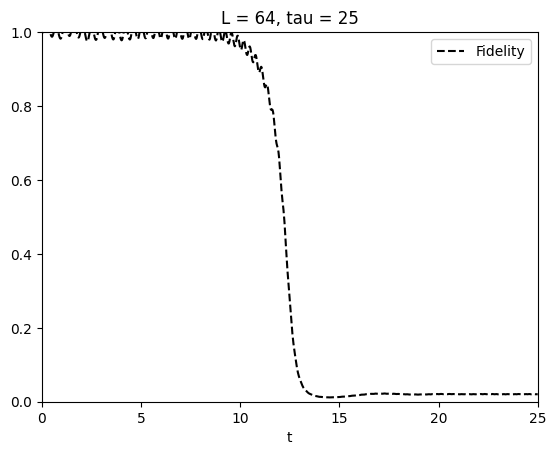

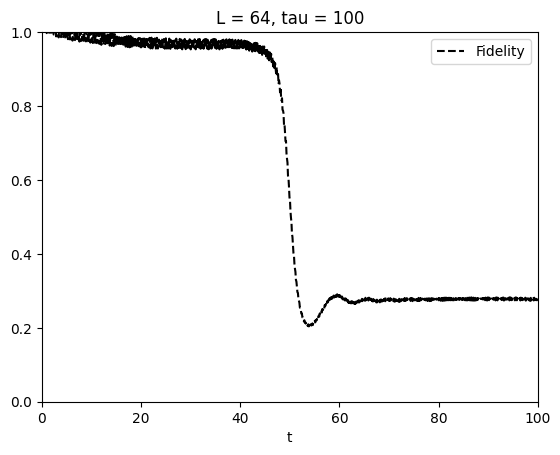

In [7]:
for j in range(1,len(taus)):
    plt.figure()    

    fidelity = [np.abs(overlap(Ut_tau[j][ti],GS_T_tau[j][ti]))**2 for ti in range(N_steps)]

    ##Plotting

    
    
    plt.plot(times_tau[j],fidelity, label =f"Fidelity", color = "black",linestyle="--" )

    plt.title(f"L = {L}, tau = {taus[j]}")

    plt.legend()
    plt.xlim(times_tau[j][0],times_tau[j][-1])
    plt.ylim(0,1)
    plt.xlabel("t")
   # plt.show()
    plt.savefig(f"ground_state_fidelity_tau={taus[j]}.png")